In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#import ../input/digit-recognizer
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
trainData = pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
trainData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
trainData.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Digit Count')

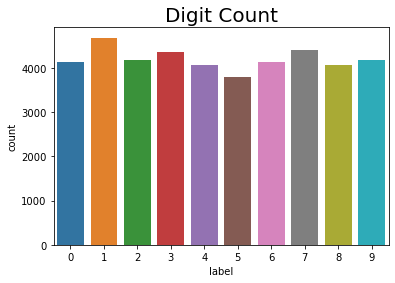

In [5]:
sns.countplot(trainData.label)
plt.title('Digit Count', fontsize = 20)

In [6]:
trainData = trainData[(trainData["label"] == 3) | (trainData["label"] == 8)]

In [7]:
trainData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
trainData.label = [1 if each == 3 else 0 for each in trainData.label]

In [9]:
y = trainData.label.values # Only labels for model training
x_data = trainData.drop(["label"], axis = 1)

In [10]:
x_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x = (x_data / 255.0)

In [12]:
print('digits({0[0]},{0[1]})'.format(x.shape))

digits(8414,784)


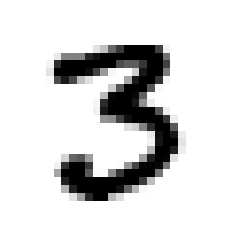

In [13]:
def showDigit(index):
    sampleDigit = x.iloc[:,0:].values[index]
    digit = sampleDigit.reshape(28, 28)
    plt.axis('off')
    plt.imshow(digit, cmap = cm.binary) 
showDigit(26)

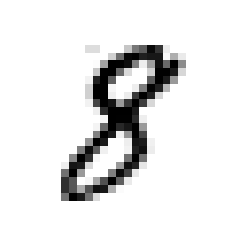

In [14]:
showDigit(5)

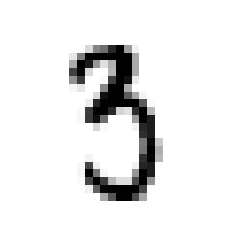

In [15]:
showDigit(100)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

x_train :  (784, 6731)
x_test :  (784, 1683)
y_train :  (6731,)
y_test :  (1683,)


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [19]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [20]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w,b

In [21]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [22]:
def forward_backward_propogation(w, b, x_train, y_train):
    
    #forward propogation z = (w.T)x + b 
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]  # x_train.shape[1] is for scaling
    
    #backward propogation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1] # x_train.shape[1] is for scaling
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1] # x_train.shape[1] is for scaling
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost, gradients

In [23]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    costList = []
    costListForPlot = []
    index = []
    
    # updating(learning) parameters is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propogation and find costs and gradients
        cost,gradients = forward_backward_propogation(w, b, x_train, y_train)
        costList.append(cost)
        #lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            costListForPlot.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
            
    parameters = {"weight" : w, "bias" : b}
    plt.plot(index, costListForPlot)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costList

In [24]:
def predict(w,b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    return Y_prediction

In [25]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    
    # initialize
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations) 
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy : {} %.".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.852469
Cost after iteration 100: 0.167710
Cost after iteration 200: 0.141061
Cost after iteration 300: 0.129618
Cost after iteration 400: 0.122880
Cost after iteration 500: 0.118299
Cost after iteration 600: 0.114917
Cost after iteration 700: 0.112282
Cost after iteration 800: 0.110149
Cost after iteration 900: 0.108373


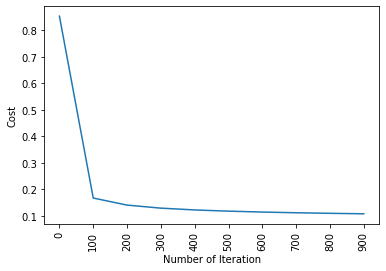

train accuracy: 96.62754419848463 %
test accuracy : 96.55377302436126 %.


In [26]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.1, num_iterations = 1000) 

In [27]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [28]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test  = pd.read_csv("../input/digit-recognizer/test.csv")

In [29]:
train=np.asarray(train)
train_x=train[:,1:].astype('float32')
train_x=np.log(train_x+1)/10
y=train[:,0]
train_y=np.zeros((y.shape[0],10))
train_y[np.arange(y.shape[0]),y]=1

In [30]:
model=Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='Adagrad',loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
model.fit(train_x,train_y, shuffle=True, epochs=100, batch_size=1000)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
42/42 [==============================] - 1s 22ms/step - loss: 1.3139 - accuracy: 0.6234
Epoch 2/100

In [31]:
test=np.asarray(test)
test_x=test.astype('float32')
test_x=np.log(test_x+1)/10


In [32]:
test=model.predict(test_x,batch_size=10000)
test_pred=np.argmax(test,axis=1)

In [33]:
df=pd.DataFrame({'ImageId':(np.arange(test_pred.shape[0])+1).astype(int),'Label':test_pred.astype(int)})
df.to_csv("neural_net.csv",index=False)